In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("C:\\Users\\Vaio\\Desktop\\Files\\car_evaluation.csv")

In [5]:
data.shape

(1728, 7)

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


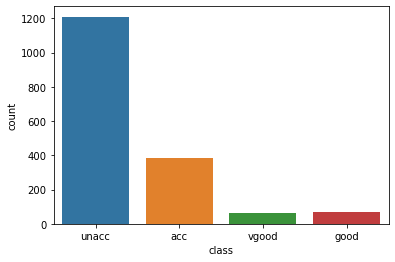

In [7]:
sns.countplot(data['class'])

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [11]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


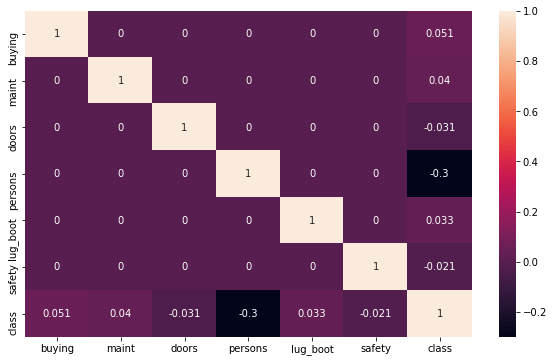

In [15]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [12]:
X=data[data.columns[:-1]]
y=data['class']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Selection

In [14]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

Logistic Regression

In [15]:
logReg = LogisticRegression()

In [16]:
logReg.fit(X_train,y_train)

LogisticRegression()

In [17]:
pred=logReg.predict(X_test)

In [18]:
logReg.score(X_test,y_test)

0.6647398843930635

KNN Classifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)

In [20]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.9229287090558767

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       118
           1       0.93      0.74      0.82        19
           2       0.93      0.99      0.96       358
           3       0.91      0.83      0.87        24

    accuracy                           0.92       519
   macro avg       0.92      0.83      0.87       519
weighted avg       0.92      0.92      0.92       519



#Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150,random_state= 51)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.9672447013487476

In [30]:
from sklearn.metrics import f1_score
print(f1_score(y_test,classifier.predict(X_test),average='macro'))

0.9045668630507944


# XGBoost

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [37]:
from xgboost import XGBClassifier
clf = XGBClassifier()

In [41]:
kfold = model_selection.KFold(n_splits=10,random_state=45)
model = XGBClassifier(n_estimators=30,random_state=45)

In [42]:
results = model_selection.cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.8819498588519963
